In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# Carga del archivo CSV
datos = pd.read_csv('/content/sample_data/distribuciones.csv')


# Ver las primeras filas para explorar los datos
print(datos.tail())


     Datos1  Datos2  Datos3
745     NaN  10.314     NaN
746     NaN  12.208     NaN
747     NaN  10.520     NaN
748     NaN  11.913     NaN
749     NaN  11.078     NaN


In [ ]:
datos1 = datos['Datos1']
datos2 = datos['Datos2']
datos3 = datos['Datos3']

In [ ]:
n1 = datos['Datos1'].count()  # Contar solo valores no nulos
n2 = datos['Datos2'].count()  # Contar solo valores no nulos
n3 = datos['Datos3'].count()  # Contar solo valores no nulos
print(n1)
print(n2)
print(n3)

k_sturges1 = int(np.ceil(np.log2(n1) + 1))
k_sturges2 = int(np.ceil(np.log2(n2) + 1))
k_sturges3 = int(np.ceil(np.log2(n3) + 1))

print(f'Número de clases para Datos1 según Sturges: {k_sturges1}')
print(f'Número de clases para Datos2 según Sturges: {k_sturges2}')
print(f'Número de clases para Datos3 según Sturges: {k_sturges3}')

500
750
300
Número de clases para Datos1 según Sturges: 10
Número de clases para Datos2 según Sturges: 11
Número de clases para Datos3 según Sturges: 10


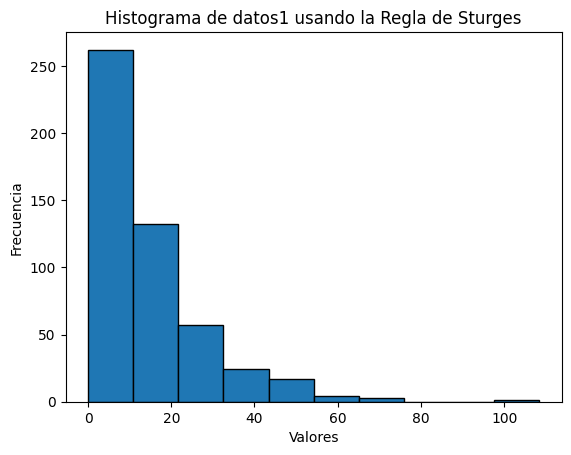

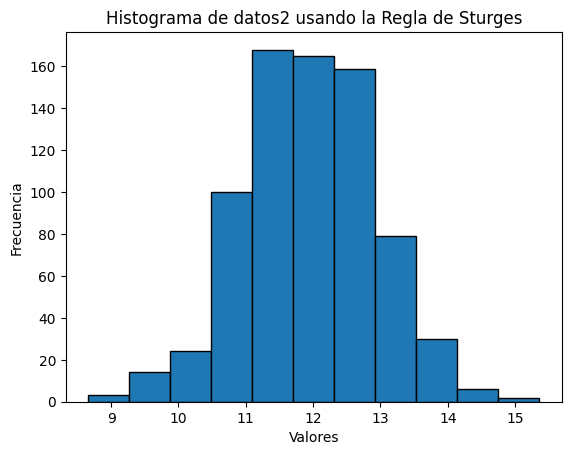

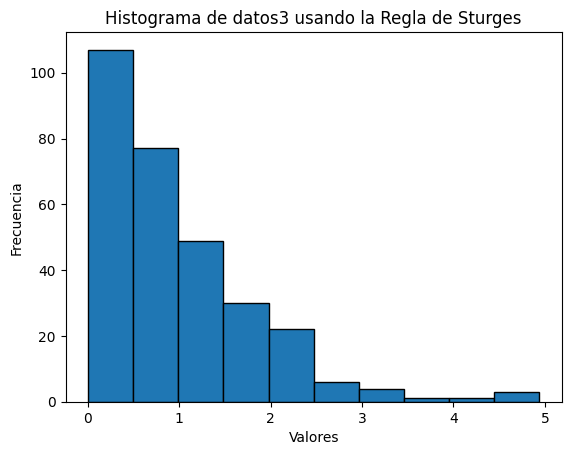

In [ ]:
plt.hist(datos1, bins=k_sturges1, edgecolor='black')
plt.title('Histograma de datos1 usando la Regla de Sturges')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(datos2, bins=k_sturges2, edgecolor='black')
plt.title('Histograma de datos2 usando la Regla de Sturges')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(datos3, bins=k_sturges3, edgecolor='black')
plt.title('Histograma de datos3 usando la Regla de Sturges')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Calcular la desviación estándar
sigma = np.std(datos1)
sigma2 = np.std(datos2)
sigma3 = np.std(datos3)

print(sigma)

# Calcular el ancho de clase usando Scott
h_scott = 3.49 * sigma * (n1 ** (-1/3))
h_scott2 = 3.49 * sigma2 * (n2 ** (-1/3))
h_scott3 = 3.49 * sigma3 * (n3 ** (-1/3))

# Determinar el rango de los datos
rango = np.max(datos1) - np.min(datos1)
rango2 = np.max(datos2) - np.min(datos2)
rango3 = np.max(datos3) - np.min(datos3)


# Número de clases según Scott
k_scott = int(np.ceil(rango / h_scott))
k_scott2 = int(np.ceil(rango2 / h_scott2))
k_scott3 = int(np.ceil(rango3 / h_scott3))

print(f'Número de clases para datos1 según la Regla de Scott: {k_scott}')
print(f'Número de clases para datos2 según la Regla de Scott: {k_scott2}')
print(f'Número de clases para datos3 según la Regla de Scott: {k_scott3}')


13.639312980915717
Número de clases para datos1 según la Regla de Scott: 19
Número de clases para datos2 según la Regla de Scott: 18
Número de clases para datos3 según la Regla de Scott: 12


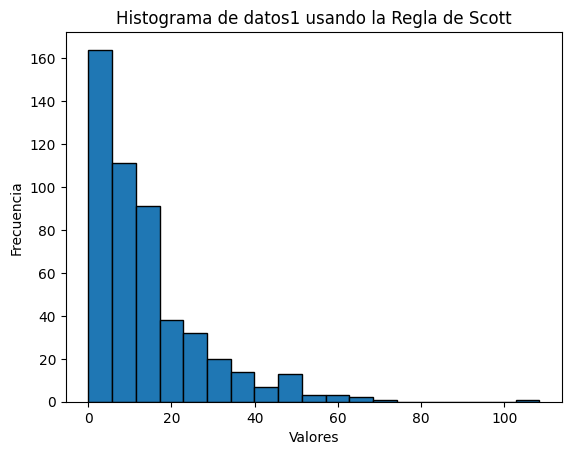

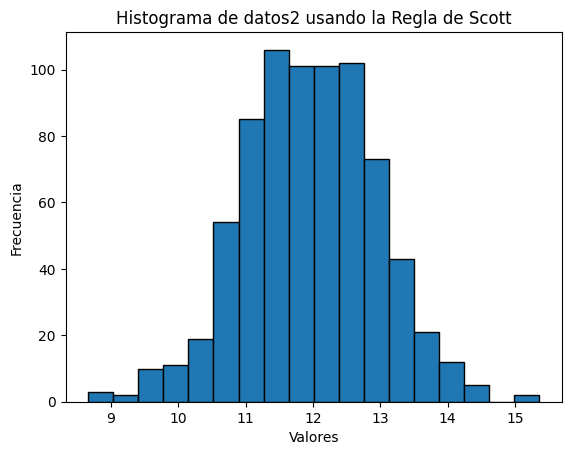

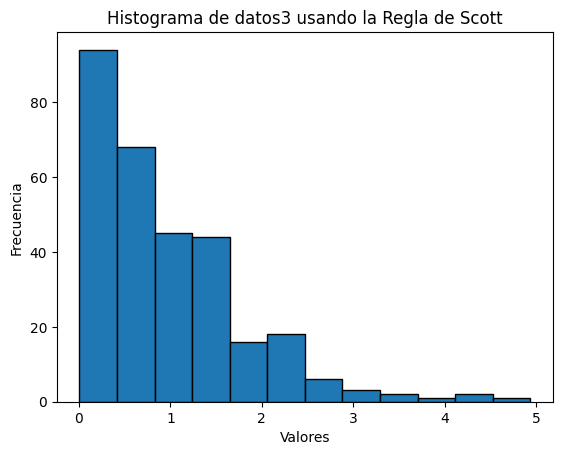

In [ ]:
# Crear el histograma usando Scott
plt.hist(datos1, bins=k_scott, edgecolor='black')
plt.title('Histograma de datos1 usando la Regla de Scott')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(datos2, bins=k_scott2, edgecolor='black')
plt.title('Histograma de datos2 usando la Regla de Scott')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(datos3, bins=k_scott3, edgecolor='black')
plt.title('Histograma de datos3 usando la Regla de Scott')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
datos['Datos1'] = datos['Datos1'].fillna(datos['Datos1'].median())
datos['Datos2'] = datos['Datos2'].fillna(datos['Datos2'].median())
datos['Datos3'] = datos['Datos3'].fillna(datos['Datos3'].median())

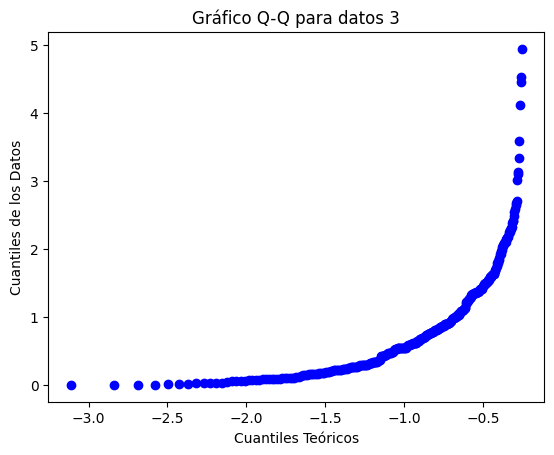

In [ ]:
# Generar el gráfico Q-Q
stats.probplot(datos3, dist="norm", plot=plt)
plt.title('Gráfico Q-Q para datos 3')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Datos')
plt.show()


In [ ]:
# Realizar la regresión para obtener los parámetros
(res, (slope1, intercept1, r1)) = stats.probplot(datos1, dist="norm", plot=None)

# Imprimir las estimaciones
print(f"Media estimada: {intercept1}")
print(f"Desviación estándar estimada: {slope1}")

Media estimada: nan
Desviación estándar estimada: nan


In [ ]:
(res, (slope2, intercept2, r2)) = stats.probplot(datos2, dist="norm", plot=None)

# Imprimir las estimaciones
print(f"Media estimada: {intercept2}")
print(f"Desviación estándar estimada: {slope2}")

Media estimada: 11.949312
Desviación estándar estimada: 0.9830894759821239


In [ ]:
(res, (slope3, intercept3, r3)) = stats.probplot(datos3, dist="norm", plot=None)

# Imprimir las estimaciones
print(f"Media estimada: {intercept3}")
print(f"Desviación estándar estimada: {slope3}")

Media estimada: nan
Desviación estándar estimada: nan
